In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import sys

sys.path += ['../']

from src.utils_network import generate_network
from src.utils_model import initialize_model
from src.simulate import update_opinions, rmsd_from_truth, score_opinion_updates

In [2]:
RNG = np.random.RandomState(42)

### Plot 1

ONLY EXPERTS

In [59]:
# set input params
N = 100
frac_experts = 1
tau = 1

Ne = int(N * frac_experts)
Na = N - Ne

# generate syntetic network
network_params = "ER_10"
A = generate_network(N, Ne, network_params, seed=RNG)

# initialize opinions and confidences

init_opinions_params = 'uniform'
init_confidence_params = 'const_0.4'
init_alpha_experts_params = 'const_0.6'
Xa, Xe, eps_a, eps_e, alpha_e = initialize_model(Na, Ne, init_opinions_params, 
                                                 init_confidence_params, init_alpha_experts_params, seed=RNG)

In [60]:
MAX_STEPS = 300
CONVERGENCE_THRESHOLD = 1e-3
opinions = [np.hstack([Xa, Xe]).tolist()]
rmsd_truth_a = []
rmsd_truth_e = []
rmsd_truth_all = []
for n_iter in tqdm(range(MAX_STEPS), total=MAX_STEPS):
    
    # update opinions
    Xa_new, Xe_new = update_opinions(Xa, Xe, eps_a, eps_e, alpha_e, tau, A)
    
    opinions.append(np.hstack([Xa_new, Xe_new]).tolist())
    
    rmsd_truth_a.append(rmsd_from_truth(Xa_new, tau))
    rmsd_truth_e.append(rmsd_from_truth(Xe_new, tau))
    rmsd_truth_all.append(rmsd_from_truth(np.hstack([Xa_new, Xe_new]), tau))
    
    is_converged = score_opinion_updates(np.hstack([Xa, Xe]), 
                                         np.hstack([Xa_new, Xe_new]), 
                                         conv_threshold=CONVERGENCE_THRESHOLD)
    
    if is_converged:
        break

    Xa = Xa_new
    Xe = Xe_new

  0%|          | 0/300 [00:00<?, ?it/s]

In [61]:
opinions = np.array(opinions)
rmsd_truth_a = np.array(rmsd_truth_a)
rmsd_truth_e = np.array(rmsd_truth_e)
rmsd_truth_all = np.array(rmsd_truth_all)

(-1.0, 12.0)

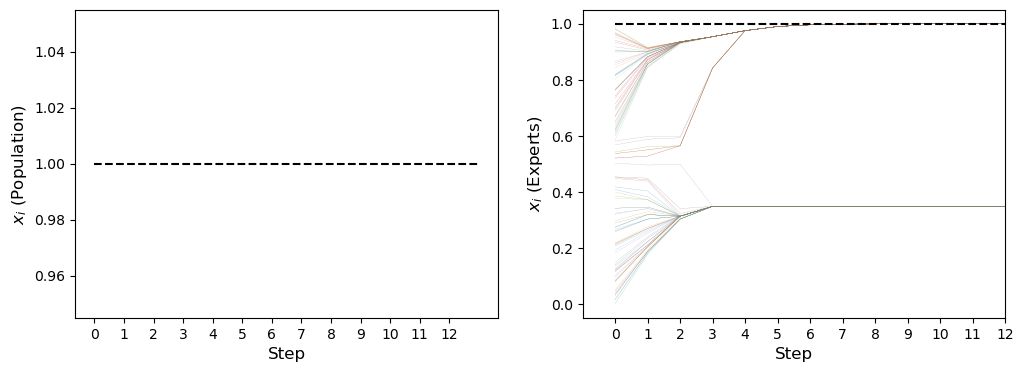

In [62]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
for n_ in range(Na):
    plt.plot(opinions[:, n_], lw=0.1)
plt.xlabel("Step", fontsize=12)
plt.ylabel("$x_i$ (Population)", fontsize=12)
plt.xticks(range(opinions.shape[0]-1), range(opinions.shape[0]-1))
plt.hlines(tau, 0, opinions.shape[0]-1, color='k', linestyle='dashed')
    
plt.subplot(1,2,2)
for n_ in range(Na, N):
    plt.plot(opinions[:, n_], lw=0.1)
    
plt.xlabel("Step", fontsize=12)
plt.ylabel("$x_i$ (Experts)", fontsize=12)
plt.xticks(range(opinions.shape[0]-1), range(opinions.shape[0]-1));
plt.hlines(tau, 0, opinions.shape[0]-1, color='k', linestyle='dashed')

plt.xlim(-1, 12)

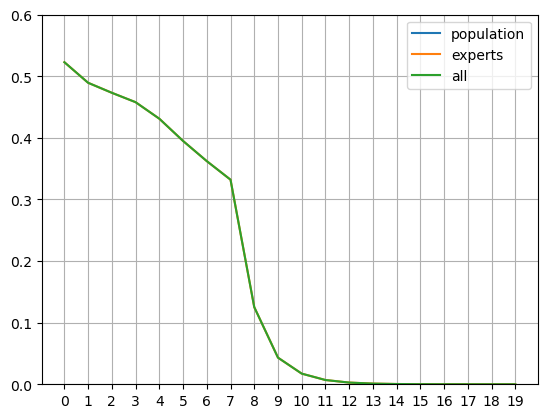

In [58]:
for rmsd, label in zip([rmsd_truth_a, rmsd_truth_e, rmsd_truth_all], ['population', 'experts', 'all']):
    plt.plot(rmsd, label=label)
    
plt.legend()
plt.ylim(0, 0.6)
plt.grid()
plt.xticks(range(opinions.shape[0]-1), range(opinions.shape[0]-1));

### PLOT 2

Both experts and population

In [164]:
# set input params
N = 1000
frac_experts = 0.05
tau = 1

Ne = int(N * frac_experts)
Na = N - Ne

# generate syntetic network
network_params = "ER_20"
A = generate_network(N, Ne, network_params, seed=RNG)

# initialize opinions and confidences

init_opinions_params = 'uniform'
init_confidence_params = 'const_0.4'
init_alpha_experts_params = 'const_0.6'
Xa, Xe, eps_a, eps_e, alpha_e = initialize_model(Na, Ne, init_opinions_params, 
                                                 init_confidence_params, init_alpha_experts_params, seed=RNG)

In [165]:
MAX_STEPS = 300
CONVERGENCE_THRESHOLD = 1e-3
opinions = [np.hstack([Xa, Xe]).tolist()]
rmsd_truth_a = []
rmsd_truth_e = []
rmsd_truth_all = []
for n_iter in tqdm(range(MAX_STEPS), total=MAX_STEPS):
    
    # update opinions
    Xa_new, Xe_new = update_opinions(Xa, Xe, eps_a, eps_e, alpha_e, tau, A)
    
    opinions.append(np.hstack([Xa_new, Xe_new]).tolist())
    
    rmsd_truth_a.append(rmsd_from_truth(Xa_new, tau))
    rmsd_truth_e.append(rmsd_from_truth(Xe_new, tau))
    rmsd_truth_all.append(rmsd_from_truth(np.hstack([Xa_new, Xe_new]), tau))
    
    is_converged = score_opinion_updates(np.hstack([Xa, Xe]), 
                                         np.hstack([Xa_new, Xe_new]), 
                                         conv_threshold=CONVERGENCE_THRESHOLD)
    
    if is_converged:
        break

    Xa = Xa_new
    Xe = Xe_new

  0%|          | 0/300 [00:00<?, ?it/s]

In [166]:
opinions = np.array(opinions)
rmsd_truth_a = np.array(rmsd_truth_a)
rmsd_truth_e = np.array(rmsd_truth_e)
rmsd_truth_all = np.array(rmsd_truth_all)

(-1.0, 50.0)

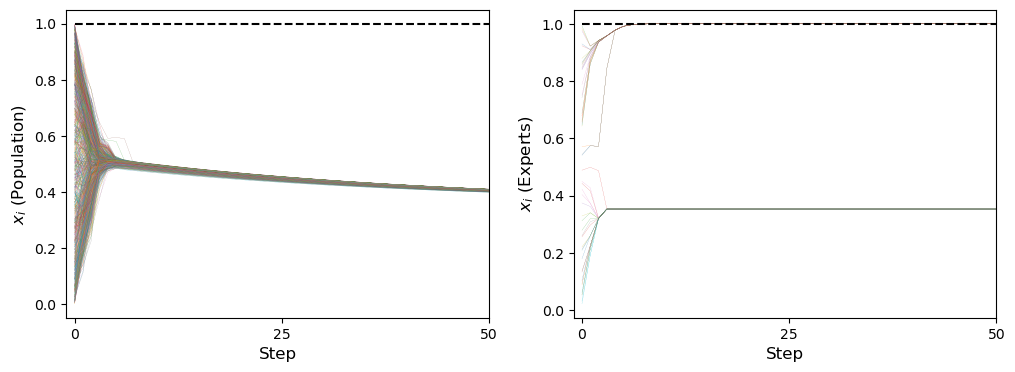

In [169]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
for n_ in range(Na):
    plt.plot(opinions[:, n_], lw=0.1)
plt.xlabel("Step", fontsize=12)
plt.ylabel("$x_i$ (Population)", fontsize=12)
plt.xticks(range(0, opinions.shape[0]-1, 25), range(0, opinions.shape[0]-1, 25));
plt.hlines(tau, 0, opinions.shape[0]-1, color='k', linestyle='dashed')
plt.xlim(-1, 50)
    
plt.subplot(1,2,2)
for n_ in range(Na, N):
    plt.plot(opinions[:, n_], lw=0.1)
    
plt.xlabel("Step", fontsize=12)
plt.ylabel("$x_i$ (Experts)", fontsize=12)
plt.xticks(range(0, opinions.shape[0]-1, 25), range(0, opinions.shape[0]-1, 25));
plt.hlines(tau, 0, opinions.shape[0]-1, color='k', linestyle='dashed')

plt.xlim(-1, 50)

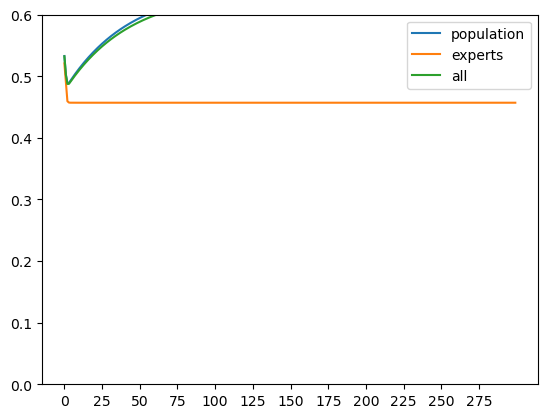

In [168]:
for rmsd, label in zip([rmsd_truth_a, rmsd_truth_e, rmsd_truth_all], ['population', 'experts', 'all']):
    plt.plot(rmsd, label=label)
    
plt.legend()
plt.ylim(0, 0.6)
#plt.grid()
plt.xticks(range(0, opinions.shape[0]-1, 25), range(0, opinions.shape[0]-1, 25));